# Photon-Box
Simulation of quantum feedback methods to stabilize photon-number states.

## 1. Introduction

Our goal is to **control the number of photons** inside a cavity. Atoms are repeatedly sent through the cavity, where they interact with the photons. Measuring their state gives some information on the cavity, and makes it possible to compute which control to apply. We say the cavity is the **system** (S) and the atom is the **meter** (M).

The cavity is modelled by a [quantum harmonic oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). Its Hamiltonian can be written as a function of the pulsation $\omega_C$ of the cavity, and the annihilation and creation operators $\mathbf{a}$ and $\mathbf{a}^{\dagger}$:

$$
\mathbf{H}_{S}=\omega_{C}\left(\mathbf{a}^{\dagger} \mathbf{a}+\frac{1}{2}\right)
$$

Each atom is modelled as a [two-state systems](https://en.wikipedia.org/wiki/Two-state_quantum_system), the Hamiltonian of which can be expressed as a function of the difference in pulsation between the excited and ground states $\omega_{eg}$ using the Pauli operator $\sigma_{Z}$:

$$
\mathbf{H}_{\mathbf{M}}=\frac{\mathbf{\omega}_{\mathrm{eg}}}{2} \mathbf{\sigma}_{Z}
$$

The Hamiltonian of the **composite system**, which also takes into account the entanglement of the system and the meter, is of the form *(see [Haroche & Raimond](http://math0.bnu.edu.cn/~zhengc/material/macsoft/ebooksclub.org__Exploring_the_Quantum__Atoms__Cavities__and_Photons__Oxford_Graduate_Texts_.pdf), section 3.4)*:

$$
\mathbf{H}= \mathbf{H}_S + \mathbf{H}_M + \mathbf{H}_I = \frac{\omega_{\mathrm{eg}}}{2} \mathbf{\sigma}_{z} \otimes \mathbf{I}_{c}+ \mathbf{I}_{q} \otimes \omega_{c}\left(\mathbf{N}+\frac{\mathbf{I}}{2}\right)+i \frac{\Omega}{2} \mathbf{\sigma}_{\mathbf{X}} \otimes\left(\mathbf{a}^{\dagger}-\mathbf{a}\right)
$$

where $\mathbf{H}_I = i \frac{\Omega}{2} \mathbf{\sigma}_{\mathbf{X}} \otimes\left(\mathbf{a}^{\dagger}-\mathbf{a}\right)$ is the **interaction Hamiltonian**, which describes the coupling between $S$ and $M$, and $\mathbf{N} = \mathbf{a} \cdot \mathbf{a}^{\dagger}$ is the "photon number" operator.

We will work in the **dispersive approximation** $\Omega \ll\left|\omega_{c}-\omega_{\mathrm{eg}}\right|$, meaning that the cavity and atoms are far from resonant. In this case, the interaction Hamiltonian is given by the simpler expression:

$$
\mathbf{H}_I \approx \mathbf{H}_{\mathrm{disp}}= -\frac{\chi}{2} \mathbf{\sigma}_{Z}\left(\mathbf{N}+\frac{\mathbf{I}}{2}\right)
$$

where $\chi=\frac{\Omega^{2}}{2\left(\omega_{c}-\omega_{\mathrm{eg}}\right)}$.




## 2. Description of the Open Loop apparatus

![experiment](pics/experiment.png)


An atom leave the box $B$, where it has been prepared in its ground state $| g \rangle$. Initially the cavity is in a coherent state $|\psi \rangle$ such that the mean number of photons corresponds to the Fock state we want to stabilize. The state of the composite system is then given by: $| \Psi \rangle=| \psi \rangle \otimes | g \rangle$.

The atom then traverse a first cavity $R$<sub>1</sub>. Next, it passes through $S$ where it interacts with the photons: this is where the state of the composite system becomes entangled. The atom then travel through one last cavity $R$<sub>2</sub>. Finally, its state is measured in a field-ionization detector $D$.

The evolution of the composite system between the release of an atom from $B$ and the moment before it is measured is summed up in the Schrödinger propagator $U_{SM}$. The state of the full system after leaving $R_2$ is given by:

$$
\mathbf{U}_{S M}( | \psi\rangle \otimes | g \rangle )=\left(\mathbf{M}_{g} | \psi\right\rangle ) \otimes | g \rangle+\left(\mathbf{M}_{e} | \psi\right\rangle ) \otimes | e \rangle
$$


This formula defines the **measurement operators** $\mathbf{M}_g$ and $\mathbf{M}_e$: they tell us how the measurement of the atoms influences the state of the cavity. Under the dispersive approximation, it can be shown that:

$$
\left\{\begin{array}{l}{\mathbf{M}_{g}=\cos \left( (\phi_R+\bar{\phi} \mathbf{N}) / 2 \right)} \\ {\mathbf{M}_{e}=\sin \left( (\phi_R+\bar{\phi} \mathbf{N}) / 2 \right)}\end{array}\right.
$$

Following the measurement (hence the collapse of the wave function), the state of the cavity is:

$$
\left\{\begin{array}{c}{\frac{\mathbf{M}_{g} | \psi \rangle}{\sqrt{\left\langle\psi\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi \right\rangle}} \text{ with probability } 
\mathbb{P}_{g}=\left\langle\psi\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi\right\rangle
} \\ {\frac{\mathbf{M}_{\mathbf{e}} | \psi \rangle}{\sqrt{\left\langle\psi\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi \right\rangle}} \text{ with probability } 
\mathbb{P}_{e}=\left\langle\psi\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi\right\rangle
}\end{array}\right.
$$


The previous paragraphs referred to the journey of a single atom through the apparatus. Repeating this process by continuously sending atoms yields a [Markov process](https://en.wikipedia.org/wiki/Markov_chain), defined at step $k$ by:

$$|\psi_{k+1} \rangle =  \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} | \psi_{k} \rangle}{\sqrt{\left\langle\psi_{k}\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi_{k}\right\rangle}} \text{ with probability } 
\mathbb{P}^{(k)}_{g}=\left\langle\psi_k\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi_k\right\rangle
} \\ {\frac{\mathbf{M}_{\mathbf{e}} | \psi_{k} \rangle}{\sqrt{\left\langle\psi_{k}\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi_{k}\right\rangle}} \text{ with probability } 
\mathbb{P}^{(k)}_{e}=\left\langle\psi_k \left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi_k \right\rangle
}\end{array}\right.$$


We will see in the next paragraph that due to mistakes in the measurement process, we have access only to probability distributions of states rather than pure states. The bra-ket formalism is therefore insufficient: we must use [density matrices](https://en.wikipedia.org/wiki/Density_matrix).

Given a pure state before measurement, the state after the measure is:

$$\mathbf{\rho}_+ = \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g} }{\text{Tr}(\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g})}  \text{with probability } \mathbb{P}_g = \text{Tr}(\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g}) } \\
 {\frac{\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e} }{\text{Tr}(\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e})}   \text{with probability } \mathbb{P}_e = \text{Tr}(\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e}) }\end{array}\right.$$

Hence the associated Markov chain:
$$
\mathbf{\rho}_{k+1} = \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g} }{\text{Tr}(\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g})}  \text{with probability } \mathbb{P}_g = \text{Tr}(\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g}) } \\
 {\frac{\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e} }{\text{Tr}(\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e})}   \text{with probability } \mathbb{P}_e = \text{Tr}(\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e}) }\end{array}\right.
$$



## 3. Simulation of the Open-loop system

We implemented the situation described above in the file `idealized_no_control.py`, in which we used the [QuTiP](http://qutip.org/) toolbox. The rest of this paragraph is a walkthrough of the code, followed by a description of our main results.

### Relevant modules

In [36]:
import qutip as q
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random

### Simulation parameters
We first defined the main parameters of the simulation, starting with the number of steps in the Markov Chain `num_steps`.

In [37]:
num_steps = 200

Then comes the dimension `n` of the Hilbert space in which we chose to work. Since the Hilbert space in question is generated by the Fock photon number states, in this simulation its dimension is equal to the maximum possible number of photons.

In [38]:
n = 10

The target number of photons `target` and the corresponding Fock state density matrix `rho_target` are then defined. 

In [39]:
target = 3
rho_target = q.fock_dm(n,target)

Finally, the initial state is chosen as a coherent state with same mean number of photons as the target state. Its density matrix is called `rho_init`.

In [40]:
rho_init = q.coherent_dm(n,target**0.5)

### Measurement operators

We then define the variables `phi_bar` and `phi_R`, corresponding to $\bar{\phi}$ and $\phi_R$ in the expression of the measurement operators. They are chosen as advised in [Dotsenko et al. (2009)](https://arxiv.org/pdf/0905.0114.pdf).

In [41]:
phi_bar =  np.pi/n 
phi_R = np.pi/2 - phi_bar*target 

We now have all the tools in hand to define the measurement operators `Mg` and `Me`.

In [42]:
Mg = q.Qobj([[0 for i in range(n)] for j in range(n)])
Me = q.Qobj([[0 for i in range(n)] for j in range(n)])
for i in range(0,n):
    Mg += np.cos((phi_R + phi_bar * i)/2) * q.fock_dm(n,i)
    Me += np.sin((phi_R + phi_bar * i)/2) * q.fock_dm(n,i)

### Fidelity

In order to show the evolution of the cavity state, we must monitor its distance to the target state through time. A simple measure is the fidelity, defined (in this situation) by:
$$F(\rho) = 1 - \text{Tr}\left(\rho \rho_{tag}\right) = 1 - \text{Tr}\left(\rho | n_{tag} \rangle \langle n_{tag} |\right)$$

In [43]:
def fidelity(rho, rho_target):
    return 1 - (rho * rho_target).tr()

### The Open-loop Markov Chain
The function `markov_chain` takes the target number of photons as argument and returns a list of the values of the fidelity at each iteration. 

In [44]:
def open_loop_markov_chain(target):
    fidelity_values = []
    rho = rho_init
    fidelity_values.append(np.real(fidelity(rho,rho_target))) # fidelity is a real number
    for i in range(num_steps):
        proba_excited = np.real((Me*rho*Me.dag()).tr())
        y = np.random.binomial(1, proba_excited) # 0 is ground, 1 is excited
        if y == 0:
            rho = Mg*rho*Mg.dag()
            rho /= rho.tr()
        if y == 1:
            rho = Me*rho*Me.dag()
            rho /= rho.tr()
        fidelity_values.append(np.real(fidelity(rho,rho_target))) # fidelity is a real number 
    return fidelity_values

Let's plot the values of the fidelity:

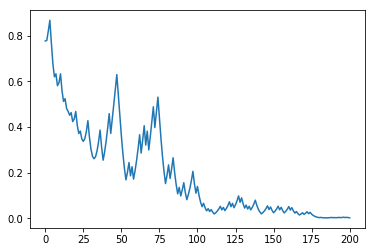

In [45]:
open_loop_fidelity_values = open_loop_markov_chain(3)    
plt.plot(np.arange(num_steps + 1), open_loop_fidelity_values)

Our goal is for the fidelity to approach 1, meaning that the



## 4. A more general Framework

We have so far described the open loop apparatus and its simulation. However, we have not yet modelled the **effect of a control** on the cavity and atoms. As we shall see below, the control consists in the injection of a pulse into the cavity, which can be modelled by the [Glauber displacement operator](https://en.wikipedia.org/wiki/Displacement_operator).


For now, we remain in a finite dimensional setting: we artificially bound the number of photons in the cavity by some quantity $d$. This way, the Hilbert space defining the cavity is $\mathbb{C}^d$, and the density matrices live in the set $\mathcal{D}(\mathbb{C}^d) :=\left\{\rho \in \mathbb{C}^{d \times d} | \rho=\rho^{\dagger}, \operatorname{Tr}(\rho)=1, \rho \geq 0\right\}$. 

We follow [Amini et al. (2011)](https://arxiv.org/pdf/1103.1365.pdf) in defining the following Markov process, a generalization of the random walk defined in the previous paragraph:

$$
\rho_{k+1}=\mathbb{U}_{\alpha_{k}}(\mathbb{M}_{\mu_{k}}\left(\rho_{k}\right))
$$

with: 
* $\mathbb{M}_{\mu}$ the superoperator $\rho \mapsto \frac { \mathbf{M}_{\mu}\rho \mathbf{M}_{\mu}^{\dagger}} {\operatorname{Tr} (\mathbf{M}_{\mu}\rho \mathbf{M}_{\mu}^{\dagger})}$, with $\mathbf{M}_{\mu}$ the associated measurement operator.
* $\mathbb{U}_{\alpha}$ the superoperator $\rho \mapsto \mathcal{D}(u)\rho\mathcal{D}(-u)$ where $\mathcal{D}(\alpha) = e^{\alpha \mathbf{a}^{\dagger} - \alpha^{*} \mathbf{a}}$ is the [Glauber displacement operator](https://en.wikipedia.org/wiki/Displacement_operator).
* $\alpha_k$ the control at step $k$
* $\mu_k$ taking the value $\mu$ with probability $\operatorname{Tr} (\mathbf{M}_{\mu}\rho_{k}\mathbf{M}_{\mu}^{\dagger})$

Moreover, the experiment is set up in such a way that the following assumptions are verified:
* for every $\mu$, the measurement operator $\mathbf{M}_{\mu}$ is diagonal in the Fock basis. Said otherwise, it is a linear combination of the pure states $|n\rangle \langle n |$.
* given two distinct integers $1 \leq n_1 < n_2 \leq d$, there is at least one measurement outcome $\mu$ such that the probability of measuring $\mu$ is different in $|n_1\rangle \langle n_1|$ and in $|n_2\rangle \langle n_2|$.



## 5. Lyapunov functions, and a stochastic version of LaSalle's theorem

Our goal is to stabilize the target Fock state $|n_{tag}\rangle \langle n_{tag}|$, for some target number of photons $n_{tag}$. A general method for choosing a control so as to stabilize a particular state, both in deterministic and stochastic systems, is to define a [Lyapunov function](https://en.wikipedia.org/wiki/Lyapunov_function).

Though the details may vary quite a lot depending on the particular setting, the idea is for such a function $V$ to be non negative, to decrease as the system evolves, and to be minimal when and only when the system has reached the desired state.

Exhibiting a suitable Lyapunov function is useful to prove that a given point is a stable equilibrium, but also to chose a control so that the system converges to this equilibrium, by picking at each step the value of the control that **minimizes the Lyapunov function**.

An example in the **deterministic setting** would be to chose $V$ such that:
* $V$ is $C^1$.
* $\dot{V}(x) = \frac{d}{d t} V(x) \leq 0 \text { for all } x$

By [LaSalle's first theorem](https://en.wikipedia.org/wiki/LaSalle%27s_invariance_principle), this would imply that for every trajectory, its accumulation points are zeros of $\dot{V}$. Choosing $V$ astutely (for instance, such that $V(x)>0, \text { for all } x \neq 0$ and $V(0)=0$, following the hypotheses of LaSalle's second theorem) could therefore narrow down the set of possible stable accumulation points and ensure the stability of the origin $x^* = 0$.

In our case time is **discrete**, and due to the quantum nature of measurement we must opt for a **probabilistic approach**. To this effect, we use the following stochastic analogue of Lasalle's first theorem, which appears in [H.J. Kushner, 1971](https://www.amazon.com/Introduction-stochastic-control-Harold-Kushner/dp/0030849675), which we quote as in the appendix of [Amini et al. (2011)](https://arxiv.org/pdf/1103.1365.pdf):


> Let $(X_k)_{k \in \mathbb{N}}$ be a Markov chain on the compact state space $S$. Suppose there
exists a non-negative function $V(X)$ satisfying: $\mathbb{E}\left(V\left(X_{k+1}\right) | X_{k}\right)-V\left(X_{k}\right)=Q\left(X_{k}\right)$, where $Q(X)$ is a positive continuous function of $X$. Then the $\omega$-limit set $\Omega$ (in the sense of almost sure convergence) of $(X_k)$ is included in the following set: $I :=\{X | \ Q(X)=0\}$.



## 6. A first Lyapunov function: fidelity

* Definition
* Choosing the control $\alpha_k$
* Proof that this works (using Kushner's theorem)

## 7. Simulation of the controlled system with fidelity

Now that we have described one method to chose the control to apply to the cavity, we turn to its implementation. Recall the general principle: measuring the system makes it possible to produce an estimate of the state of the cavity following the measurement. The control is a function of this estimate.

In the current situation, we assume all measurements are exact: therefore our estimate of the state of the cavity after measurement is exact. However, this assumption will not hold in subsequent simulations, when we will have to take measurement omissions and errors into account.

When our estimate is not exact, we must distinguish the estimated density matrix `rho_estimate` from the actual density matrix `rho_real`. We will start making the difference now, so that we are prepared when the distinction becomes necessary. 

The experimenter (and the simulator) is only allowed to use `rho_estimate` to determine the control. However, the evolution of the actual system (*eg* the measurement results) depends on `rho_real`.

### Real and Estimated parameters

`rho_estimate` lives in a finite-dimensional Hilbert space whose dimension `n_estimate` is the maximum number of photon that can be unambiguously measured. In theory, `rho_real` lives in an infinite-dimensional space, but for computational purposes we restrain ourselves to a finite dimension `n_real > n_estimate`.

In [46]:
n_real = 20 # dimension of the Hilbert space describing the cavity 
n_estimate = 15 # maximum number of photon unambiguously measured

This implies that we must distinguish real and estimated target states.

In [47]:
target = 3 # we want to stabilize the Fock state |target>
rho_target_real = q.fock_dm(n_real,target) # target density matrix
rho_target_estimate = q.fock_dm(n_estimate,target) # target density matrix

The cavity parameters also differ.

In [48]:
phi_bar_estimate =  np.pi/n_estimate # parameter for phi(n)
phi_bar_real =  np.pi/n_real # parameter for phi(n)
phi_R_estimate = np.pi/2 - phi_bar_estimate*target # parameter for phi(n)
phi_R_real = np.pi/2 - phi_bar_real*target # parameter for phi(n)

So do the real and estimated initial states.

In [49]:
rho_init_real = q.coherent_dm(n_real,target**0.5) # initial density matrix
rho_init_estimate = q.coherent_dm(n_estimate,target**0.5) # initial density matrix

### Measurement operators
Once again, we must define both real and estimated measurement operators.

In [50]:
Mg_real = q.Qobj([[0 for i in range(n_real)] for j in range(n_real)])
Me_real = q.Qobj([[0 for i in range(n_real)] for j in range(n_real)])
Mg_estimate = q.Qobj([[0 for i in range(n_estimate)] for j in range(n_estimate)])
Me_estimate = q.Qobj([[0 for i in range(n_estimate)] for j in range(n_estimate)])
for i in range(0,n_real):
    Mg_real += np.cos((phi_R_real + phi_bar_real * i)/2) * q.fock_dm(n_real,i)
    Me_real += np.sin((phi_R_real + phi_bar_real * i)/2) * q.fock_dm(n_real,i)
for i in range(0,n_estimate):
    Mg_estimate += np.cos((phi_R_estimate + phi_bar_estimate * i)/2) * q.fock_dm(n_estimate,i)
    Me_estimate += np.sin((phi_R_estimate + phi_bar_estimate * i)/2) * q.fock_dm(n_estimate,i)

### Control parameters
We define the control parameters as in [Dotsenko et al. (2009)](https://arxiv.org/pdf/0905.0114.pdf). Since it is a Glauber displacement superoperator, the control is also a function of the annihilation and creation operators.

In [51]:
c_1 = 1/(4*target + 2)
c_2 = 0.1
epsilon = 0.001 
a_real = q.destroy(n_real) # annihilation operator; the creation operator is given by a_real.dag()
a_estimate = q.destroy(n_estimate) # annihilation operator; the creation operator is given by a_estimate.dag()

We also write the function `commutator`, which (surprinsingly enough) computes the commutator of two operators.

In [52]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

### The Closed-loop Markov Chain
The function `markov_chain` takes the target number of photons as argument and returns three lists:
* a list of the fidelity of the real state at each iteration. 
* a list of the fidelity of the estimated state at each iteration. 
* a list containing the value of the control at each iteration. 

In [53]:
def idealized_control_markov_chain(target):
    fidelity_values_estimate = []
    fidelity_values_real = []
    alpha_k_values = []
    rho_real = rho_init_real # actual (pure) state of the system
    rho_estimate = rho_init_estimate # estimated density over possible states of the system
    fidelity_values_estimate.append(fidelity(rho_estimate,rho_target_estimate))
    fidelity_values_real.append(fidelity(rho_real,rho_target_real))
    for i in range(num_steps):
        # Measurement: project rho_real and rho_estimate
        proba_excited = np.real((Me_real*rho_real*Me_real.dag()).tr())
        mu = np.random.binomial(1, proba_excited) # 0 is ground, 1 is excited
        if mu == 0:
            rho_real = Mg_real*rho_real*Mg_real.dag()
            rho_real /= rho_real.tr()
            rho_estimate = Mg_estimate*rho_estimate*Mg_estimate.dag()
            rho_estimate /= rho_estimate.tr()
        if mu == 1:
            rho_real = Me_real * rho_real * Me_real.dag()
            rho_real /= rho_real.tr()
            rho_estimate = Me_estimate*rho_estimate*Me_estimate.dag()
            rho_estimate /= rho_estimate.tr()
        # Control
        if np.real((rho_estimate * rho_target_estimate).tr()) >= epsilon:
            alpha_k = c_1 * (commutator(rho_target_estimate, a_estimate.dag() - a_estimate) * rho_estimate).tr()
        else:
            alpha_k = c_2 * np.sign(target - q.expect(a_estimate.dag() * a_estimate, rho_estimate))
        alpha_k_values.append(alpha_k)
        rho_real = q.displace(n_real, alpha_k) * rho_real * q.displace(n_real, -alpha_k)
        rho_estimate = q.displace(n_estimate, alpha_k) * rho_estimate * q.displace(n_estimate, -alpha_k)
        # Add the value of the fidelity to the list
        fidelity_values_estimate.append(fidelity(rho_estimate,rho_target_estimate))
        fidelity_values_real.append(fidelity(rho_real,rho_target_real)) 
    return fidelity_values_real, fidelity_values_estimate, alpha_k_values

Let's plot the values of the fidelity:

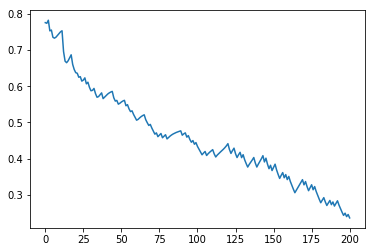

In [59]:
idealized_control_fidelity_values = idealized_control_markov_chain(3)[0]    
plt.plot(np.arange(num_steps + 1), idealized_control_fidelity_values)

**TODO: FIX THIS**

## 8. Deviations from the previous model

This model is far from enough to describe the photon box experiment. Here are some of the elements it omits:

* The detector  $D$ does not measure all of the atoms that pass through it: there is a probability that it **missed an atom**.
* The detector $D$ sometimes gives **false measures**: there is a probability that it **made a mistake**.
* The cavity is not a perfect reflector: it may absorb photons. Some photons are also created due to thermal fluctuations. This **relaxation of the cavity** is described by the [Lindblad equation](https://en.wikipedia.org/wiki/Lindbladian).


Given a python file in this folder, the following table says whether or not the simulated system is controlled, and gives the corrections it does and doesn't includes. For instance, ```lindblad_control.py```  includes a control and takes the relaxation of the cavity into consideration via the Lindblad equation, but it does not account for delays, omissions and errors in the measurement process.


| Simulation                        | Control | Omit | Mistake | Relaxation |
| :--------------------------------:|:-------:| :---:| :------:| :---------:|
| ```idealized_no_control.py```     |  No     | No   | No      | No         |
| ```idealized_control.py```        |  Yes    | No   | No      | No         |
| ```lindblad_control.py```         |  Yes    | No   | No      | Yes        |
| ```lindblad_omission_control.py```|  Yes    | Yes  | No      | Yes        |
| ```omission_control.py```         |  Yes    | Yes  | No      | No         |
| ```error_control.py```            |  Yes    | No   | Yes     | No         |
| ```error_omission_control.py```   |  Yes    | Yes  | Yes     | No         |







## References
* Haroche and Raimond, [Exploring the Quantum:
Atoms, Cavities and Photons](http://math0.bnu.edu.cn/~zhengc/material/macsoft/ebooksclub.org__Exploring_the_Quantum__Atoms__Cavities__and_Photons__Oxford_Graduate_Texts_.pdf), 2006
* H.J. Kushner, [Introduction to Stochastic Control](https://www.amazon.com/Introduction-stochastic-control-Harold-Kushner/dp/0030849675), 1971
* Dotsenko et al., [Quantum feedback by discrete quantum non-demolition measurements:
towards on-demand generation of photon-number states](https://arxiv.org/pdf/0905.0114.pdf), 2009
* Amini et al., [Design of Strict Control-Lyapunov Functions
for Quantum Systems with QND Measurements](https://arxiv.org/pdf/1103.1365.pdf), 2011
* Amini et al., [Feedback stabilization of discrete-time quantum systems subject to
non-demolition measurements with imperfections and delays](https://arxiv.org/pdf/1201.1387.pdf), 2013
* Sayrin et al., [Real-time quantum feedback prepares and stabilizes
photon number states](https://arxiv.org/pdf/1107.4027.pdf), 2011
* Somaraju et al., [Semi-Global Approximate stabilization of an infinite
dimensional quantum stochastic system](https://arxiv.org/pdf/1103.1732.pdf), 2011

## Authors
This is a joint project by [Jean-Stanislas Denain](https://github.com/denainjs) and Benjamin Dupuis, supervised by [Mazyar Mirrahimi](https://who.rocq.inria.fr/Mazyar.Mirrahimi/).

## License
This project is under the MIT license.
